#Import Libraries

In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read Data

In [208]:
#df = pd.read_csv('winequality-red.csv')
df = pd.read_csv('winequality-white.csv')

#Data cleaning

In [209]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [210]:
#splitting the values into colom
df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]] = df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)

In [211]:
#dropping the first colum
df.drop('fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"', axis=1, inplace=True)

In [212]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [213]:
df.shape

(4898, 12)

In [214]:
#removing duplicates values
df.drop_duplicates(inplace=True)

In [215]:
df.shape

(3961, 12)

In [216]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
6,6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6


In [217]:
#checking the nan colums
nan_columns = df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]].isna().any()

# Print the columns with NaN values
print(nan_columns)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [218]:
# Remove rows or columns with any missing values (but there is no nan values exist in the dataframe)
df.dropna(axis=0, inplace=True)

In [219]:
df.shape

(3961, 12)

In [220]:
# View the data types of all columns
print(df.dtypes)

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object


In [221]:
# View the unique values of all columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'fixed acidity': ['7' '6.3' '8.1' '7.2' '6.2' '8.6' '7.9' '6.6' '8.3' '7.4' '6.5' '6.4'
 '6.8' '7.6' '6.9' '8.5' '5.8' '7.3' '6.7' '6' '7.1' '6.1' '7.5' '9.8'
 '5.5' '5.9' '7.8' '5.7' '8.2' '5.6' '5.2' '8.4' '10.2' '7.7' '5.3' '5.4'
 '9.1' '5' '8' '10' '5.1' '9.2' '9' '8.8' '8.7' '4.8' '10.3' '9.4' '9.6'
 '9.3' '8.9' '9.7' '10.7' '14.2' '9.9' '9.5' '11.8' '4.6' '6.15' '4.5'
 '7.15' '6.45' '4.2' '4.9' '4.7' '3.8' '4.4' '3.9']
Unique values in 'volatile acidity': ['0.27' '0.3' '0.28' '0.23' '0.32' '0.22' '0.18' '0.16' '0.42' '0.17'
 '0.48' '0.66' '0.34' '0.31' '0.26' '0.67' '0.25' '0.24' '0.14' '0.12'
 '0.39' '0.33' '0.45' '0.46' '0.19' '0.2' '0.21' '0.38' '0.47' '0.35'
 '0.54' '0.43' '0.44' '0.265' '0.36' '0.305' '0.13' '0.41' '0.485' '0.425'
 '0.37' '0.255' '0.595' '0.29' '0.53' '0.15' '0.57' '0.4' '0.245' '0.685'
 '0.495' '0.64' '0.52' '0.115' '0.58' '0.585' '0.59' '0.6' '0.55' '0.125'
 '0.1' '0.145' '0.335' '0.365' '0.905' '0.49' '0.155' '0.51' '0.62'
 '0.345' '0.475

In [222]:
# Convert columns to float64 data type
df = df.astype(float)

# View the data types of all columns
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object


In [223]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0


##Removing Outliers

In [224]:
df.shape

(3961, 12)

In [225]:
# Calculate IQR and bounds for each column
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from DataFrame
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

In [226]:
df.shape

(3083, 12)

In [227]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6.0


#Data Visualization

##pie chart of every element in wine

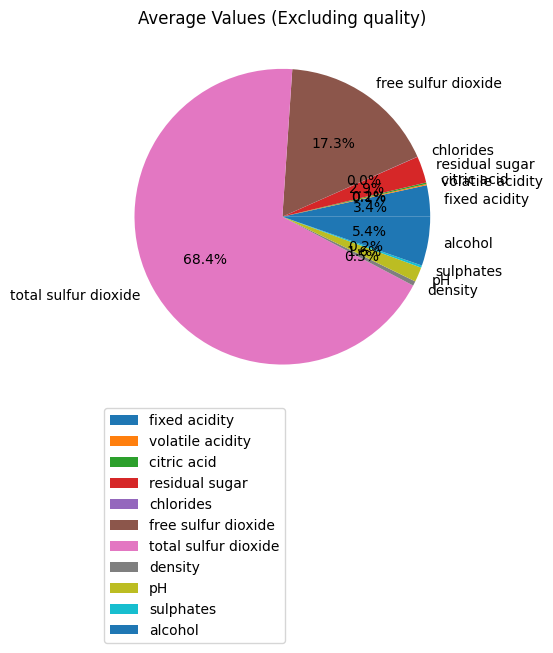

In [228]:
# Define the column to exclude
exclude_column = 'quality'

# Calculate the average value for each column (excluding the specified column)
averages = df.drop(exclude_column, axis=1).mean()

# Create a pie chart using the average values
plt.pie(averages, labels=averages.index, autopct='%1.1f%%')
plt.title("Average Values (Excluding {})".format(exclude_column))

# Add a legend and position it in the upper left corner
plt.legend(averages.index, loc='upper left', bbox_to_anchor=(0, 0))

plt.show()

##bar chart of every element in wine

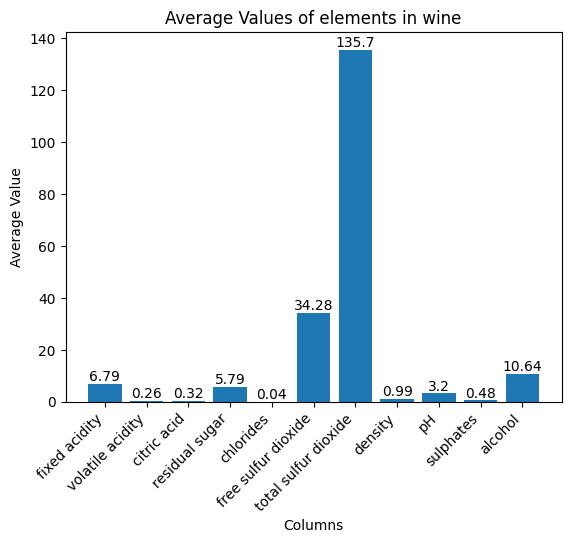

In [229]:
# Define the column to exclude
exclude_column = 'quality'

# Calculate the average value for each column (excluding the specified column)
averages = df.drop(exclude_column, axis=1).mean()

# Create a bar chart using the average values
plt.bar(averages.index, averages)
plt.title("Average Values of elements in wine")
plt.xlabel("Columns")
plt.ylabel("Average Value")
# Set the x-axis tick labels to the column names
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed

# Add value labels on top of each bar
for i, v in enumerate(averages):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')


plt.show()

## heatmap

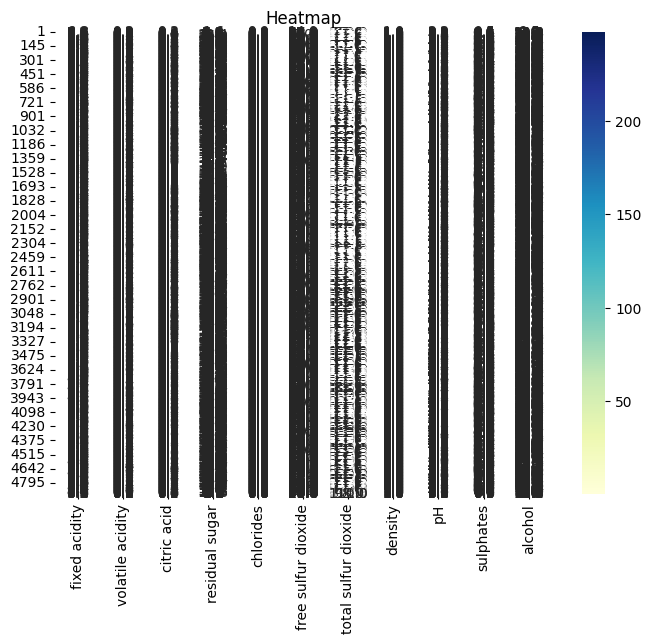

In [231]:
# Define the column to exclude
exclude_column = 'quality'

# Exclude the specified column
heatmap_data = df.drop(columns=exclude_column)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)

# Add a title
plt.title('Heatmap')

# Show the plot
plt.show()


##scatter plot

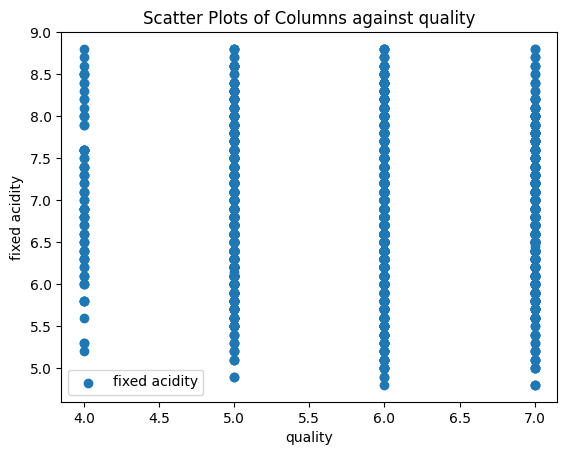

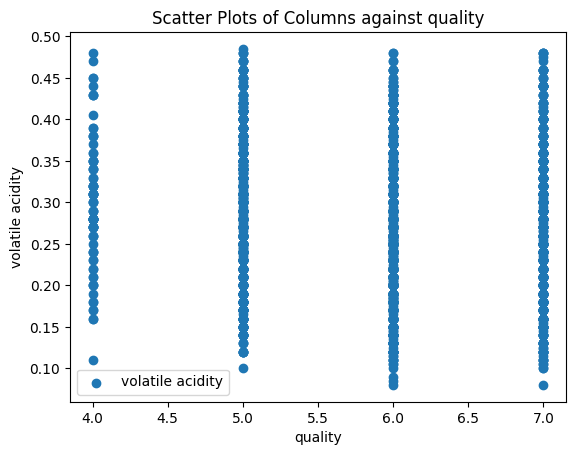

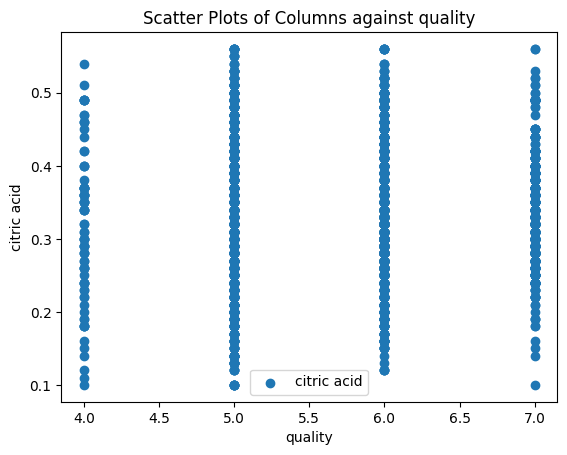

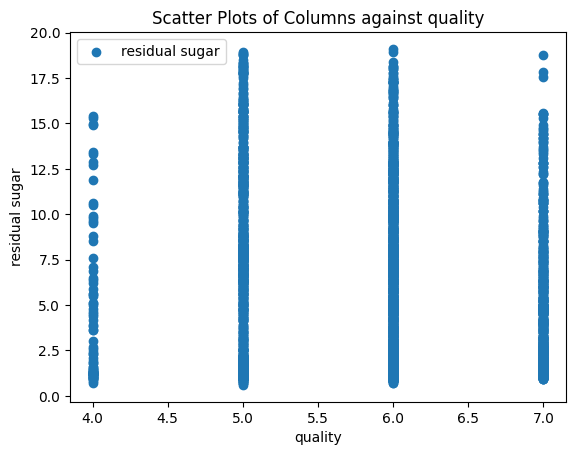

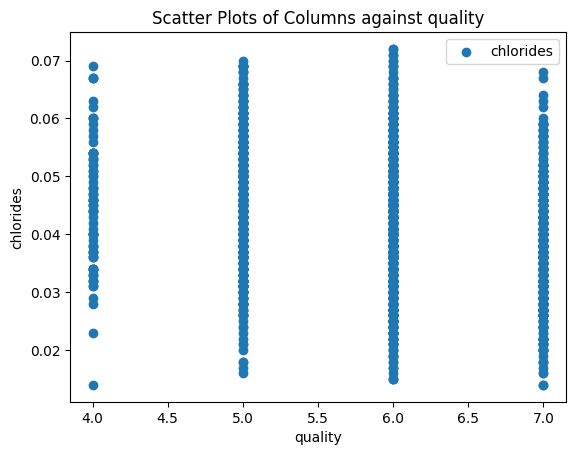

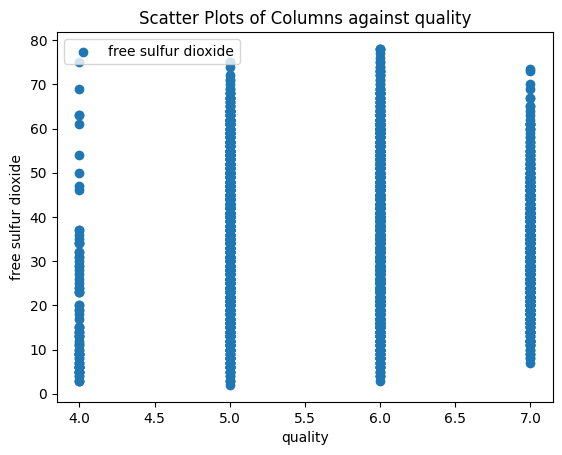

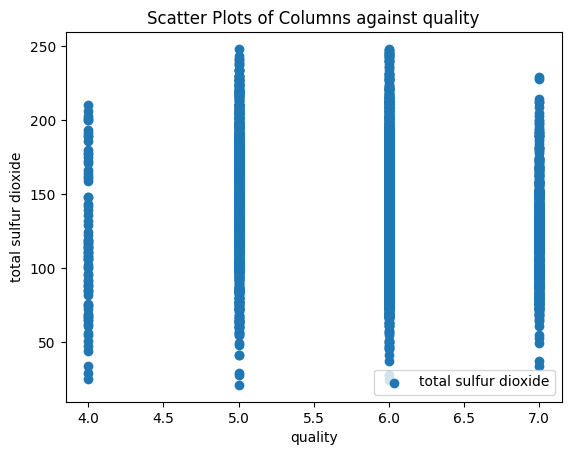

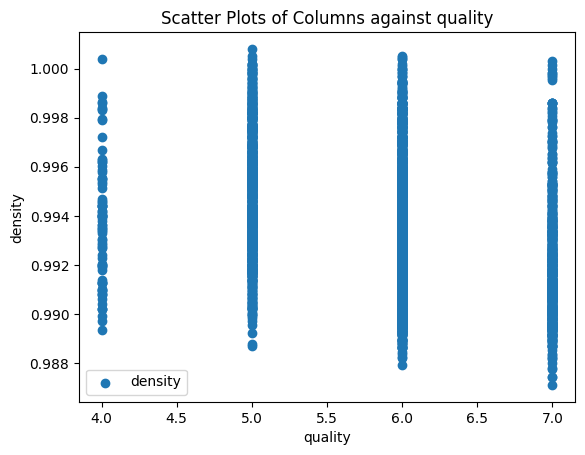

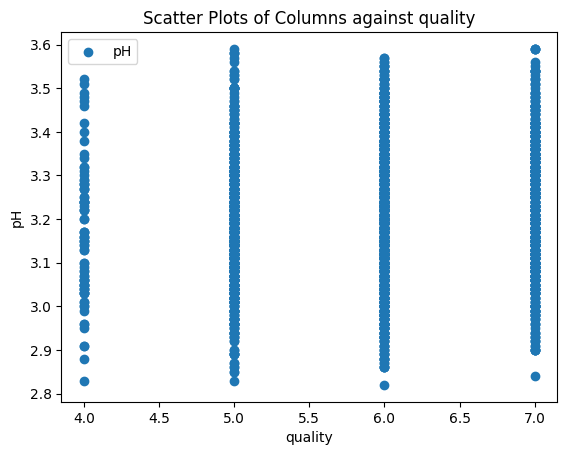

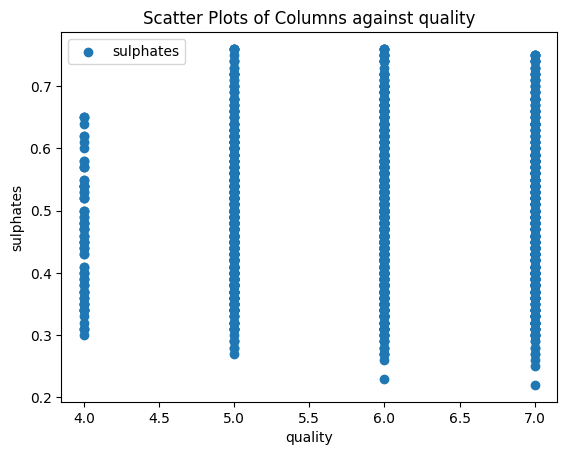

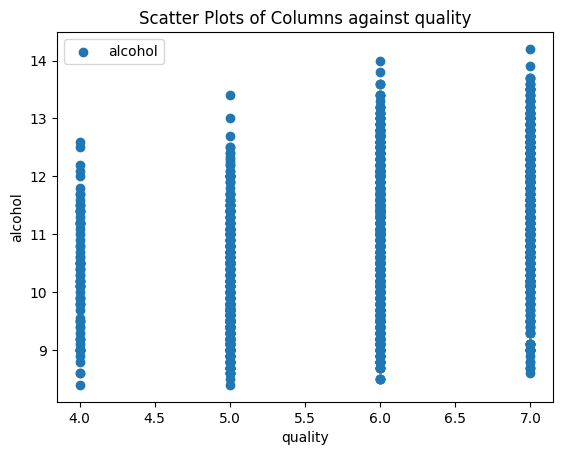

In [237]:

# Specify the specific column to compare against
compare_column = 'quality'

# Iterate over each column (excluding the compare column)
for column in df.columns:
    if column != compare_column:
        # Create the scatter plot
        plt.scatter(df[compare_column], df[column], label=column)

        # Add labels and title
        plt.xlabel(compare_column)
        plt.ylabel(column)
        plt.title("Scatter Plots of Columns against {}".format(compare_column))

        # Add legend
        plt.legend()

        # Show the plot
        plt.show()